In [ ]:
#1. Google Colaboratory Dosyası Açılması
"Insurance Dataset": https://www.kaggle.com/datasets/mirichoi0218/insurance



SyntaxError: ignored

In [2]:
# Gerekli Kütüphanelerin Eklenmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing

In [4]:
#3. Keşifsel Veri Analizi Yapılması

df = pd.read_csv("insurance.csv")
dataset=df

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


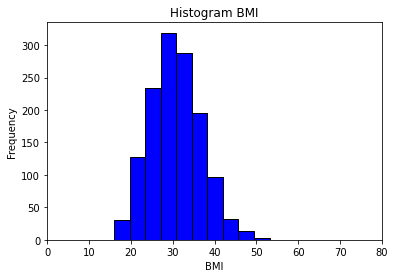

In [ ]:
#Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
num_bins = 50
n, bins, patches = plt.hist(dataset.bmi, color='b',  histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('BMI')
plt.xlim([0, 80])  
  
plt.title ('Histogram BMI')
plt.show()

#normal dağılım olduğunu görüyoruz

In [ ]:
#“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
df.groupby("smoker").agg({"charges":["count","sum","mean","median"]})

# ortalamanın sigara içenlerde daha yüksek olduğu görülmekte

charges                                         
         count           sum          mean       median
smoker                                                 
no        1064  8.974061e+06   8434.268298   7345.40530
yes        274  8.781764e+06  32050.231832  34456.34845

In [ ]:
#“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.
df.groupby(["region","smoker"]).agg({"smoker":"count"})

#bölgelerin yaklaşık sigara içen ve içmeyen oranlarının eşit olduğunu söyleyebiliriz,
# ama yine de southeast bölgesinde sigara içen oranı daha yüksek diyebiliriz

smoker
region    smoker        
northeast no         257
          yes         67
northwest no         267
          yes         58
southeast no         273
          yes         91
southwest no         267
          yes         58

In [ ]:
#“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
df.groupby("sex").agg({"bmi":["count","mean","median","min","max"]})

#yaklaşık olarak ortalama değerler aynı fakat erkeklerde maximum bmi değerinin daha yüksek olduğunu söyleyebiliriz.

bmi                                   
       count       mean   median     min    max
sex                                            
female   662  30.377749  30.1075  16.815  48.07
male     676  30.943129  30.6875  15.960  53.13

In [5]:
#En çok “children”’a sahip “region”’ı bulunuz.
df.groupby("region").agg({"children":"sum"}).reset_index().sort_values("children",ascending=False)

#yaklaşık olarak değerler aynı ancak southeast bölgesi en çok çocuk sayısına sahip

,region,children
2,southeast,382
1,northwest,373
3,southwest,371
0,northeast,339


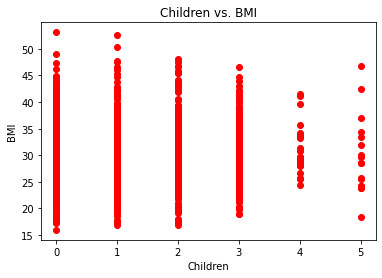

bmi                                   
         count       mean   median     min    max
children                                         
0          574  30.550296  30.3025  15.960  53.13
1          324  30.623148  30.0150  16.815  52.58
2          240  30.978104  31.6400  16.815  48.07
3          157  30.684331  30.4950  18.905  46.53
4           25  31.391200  29.6400  24.415  41.47
5           18  29.605000  28.5500  18.300  46.75

In [6]:
#“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.
plt.scatter(x=df["children"], y=df["bmi"], color="red")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.title("Children vs. BMI")
plt.show()

df.groupby("children").agg({"bmi":["count","mean","median","min","max"]})

# bmi ile çocuk sayısı arasında kuvvetli bir ilişki olduğu gözlenmemiştir.

In [ ]:
#“bmi” değişkeninde outlier var mıdır? İnceleyiniz.
df["bmi"].describe().T
max_value = df["bmi"].mean() + 3*df["bmi"].std()
min_value = df["bmi"].mean() - 3*df["bmi"].std()
count = 0
list_index = []
for index, value in enumerate(df["bmi"]):
  if (value<min_value) | (value>max_value):
    count +=1
    list_index.append(index)
print(count)
df.loc[list_index]

# 4 tane outlier olduğu gözlemlenmiştir.

4


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


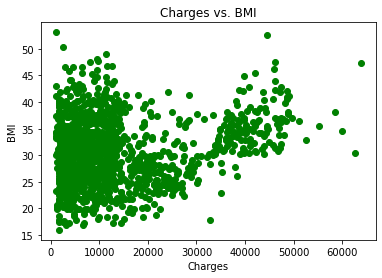

In [ ]:
# “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
plt.scatter(x=df["charges"], y=df["bmi"], color="green")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.title("Charges vs. BMI")
plt.show()

#charges değeri arttıkça bmi değerinde de bir artış gözlenmiştir ama kesin bir doğrusal oran vardır denilemez

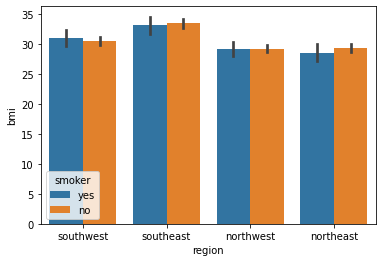

In [ ]:
#“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

sns.barplot(x="region",y = "bmi",hue="smoker", data=df)

#bölgelere göre sigara içip içmeme oranının bmi üzerinde bir etkisi vardır denilemez

In [ ]:
#4. Veri Ön İşleme Yapılması,
#Bu kısımda elinizde olan veriyi model eğitmek için hazır hale getiriniz.
#Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini kullanınız.
#Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.
#Veri setini normalize ederek ölçekleyiniz.


In [ ]:
#Bağımlı ve Bağımsız Değişkenleri Oluşturmak
X = dataset.drop("bmi",axis=1)
y = dataset["bmi"]

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [ ]:
#onehot encoding
categoric = ["sex","smoker","region"]
one_hot_encoded_data = pd.get_dummies(X, columns = categoric,drop_first=True)
print(one_hot_encoded_data)

      age  children      charges  sex_male  smoker_yes  region_northwest  \
0      19         0  16884.92400         0           1                 0   
1      18         1   1725.55230         1           0                 0   
2      28         3   4449.46200         1           0                 0   
3      33         0  21984.47061         1           0                 1   
4      32         0   3866.85520         1           0                 1   
...   ...       ...          ...       ...         ...               ...   
1333   50         3  10600.54830         1           0                 1   
1334   18         0   2205.98080         0           0                 0   
1335   18         0   1629.83350         0           0                 0   
1336   21         0   2007.94500         0           0                 0   
1337   61         0  29141.36030         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_data)
y_scaled = y.values.reshape(-1, 1)

In [ ]:
X_scaled

array([[0.02173913, 0.        , 0.25161076, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.2       , 0.00963595, ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.6       , 0.05311516, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00810808, ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.        , 0.01414352, ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.44724873, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
#train ve test gruplarının oluşturulması 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_scaled, y_scaled, train_size=0.8)


In [ ]:
#5. Model Seçme
#Birkaç regresyon modeli seçiniz bunları ön işleme yapılan veri ile eğitiniz
#Seçilen modellerin performanslarını çapraz doğrulama kullanarak inceleyiniz.
#En iyi performans gösteren modeli seçiniz


In [ ]:
# Imports
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

In [ ]:
# Models Object
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
    }
}

In [ ]:
# Add dictionary attributes
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [ ]:
# Let's try our luck with a bunch of models
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(X_train, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Running  Lasso()
MAE:  4.788054993722974
MSE:  36.57628300497697
RMSE:  6.0478329180771
R2:  -0.025454565546821906


Running  LinearRegression()
MAE:  4.466925978383418
MSE:  31.247508811048842
RMSE:  5.5899471205950455
R2:  0.12394322386737666


Running  Ridge()
MAE:  4.481456012768846
MSE:  31.36374564607932
RMSE:  5.60033442270007
R2:  0.12068440193758967


Running  ElasticNet()
MAE:  4.777736743344337
MSE:  36.1443787539556
RMSE:  6.012019523750368
R2:  -0.013345675585841654


Running  KNeighborsRegressor()
MAE:  5.094902985074627
MSE:  39.517799141791045
RMSE:  6.286318409195564
R2:  -0.10792306437474286


Running  RandomForestRegressor()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


MAE:  4.554355223880599
MSE:  35.58718732516794
RMSE:  5.965499754854402
R2:  0.002275772182815383


Running  GradientBoostingRegressor()
MAE:  4.405954263231555
MSE:  30.72058170123625
RMSE:  5.542615059810328
R2:  0.13871617962108718


Running  AdaBoostRegressor(learning_rate=1.2, loss='exponential', n_estimators=5,
                  random_state=2)
MAE:  4.520181896397769
MSE:  31.028747767363523
RMSE:  5.570345390311405
R2:  0.1300764198233566


Running  DecisionTreeRegressor(max_depth=9, min_samples_split=4, random_state=1)
MAE:  4.860139562873466
MSE:  39.69679496050578
RMSE:  6.300539259500394
R2:  -0.11294140042299117




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#6. Hiper-parametre Optimizasyonu
#Bir önceki adımda seçilen modelin hiper-parametrelerinin optimize ediniz.
#Grid Search ile parametreleri optimize ediniz.



In [ ]:
from sklearn.model_selection import GridSearchCV
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
#7. Modeli Değerlendirme
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=4, subsample=0.9)

 The best score across ALL searched params:
 0.2024283822667205

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
